<a href="https://colab.research.google.com/github/slvr2604/Laboratorio-3-Procesamiento/blob/main/LabSe%C3%B1ales3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload ()


Saving hombre 1.wav to hombre 1.wav
Saving hombre 2.wav to hombre 2.wav
Saving hombre 3.wav to hombre 3.wav
Saving mujer 1.wav to mujer 1.wav
Saving mujer 2.wav to mujer 2.wav
Saving mujer 3.wav to mujer 3.wav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de la señal
ruta = "/content/drive/MyDrive/Colab Notebooks/hombre 1.wav"
ruta = "/content/drive/MyDrive/Colab Notebooks/hombre 2.wav"
ruta = "/content/drive/MyDrive/Colab Notebooks/hombre 3.wav"
ruta = "/content/drive/MyDrive/Colab Notebooks/mujer 1.wav"
ruta = "/content/drive/MyDrive/Colab Notebooks/mujer 2.wav"
ruta = "/content/drive/MyDrive/Colab Notebooks/mujer 3.wav"

HOMBRE 1

Forma de la señal (shape): (177152,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 4.02 segundos


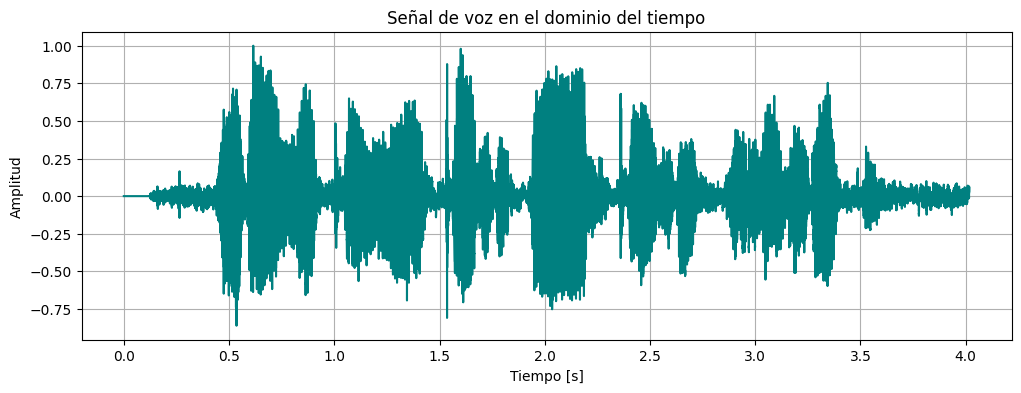

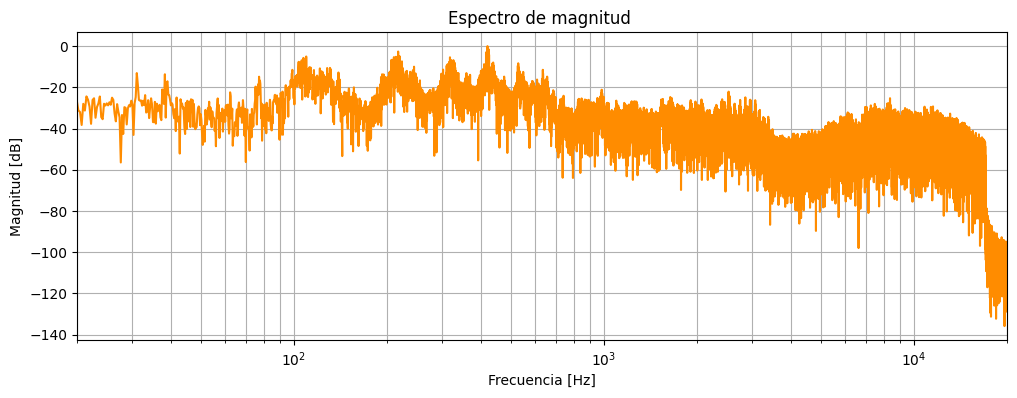


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 421.0 Hz
Frecuencia media: 5111.1 Hz
Brillo espectral: 0.6 
Energía total (intensidad): 4353.139116
Relación Señal/Ruido (SNR): 12.57 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,4.02,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",12.57


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd

ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/hombre 1.wav"

frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)

print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)

datos_audio = datos_audio / np.max(np.abs(datos_audio))

numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")

tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]

plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Transformada de Fourier


numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)

frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])

plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()



indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]

frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000  # Hz
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total

energia_total = np.sum(datos_audio**2)

# SNR

umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)


print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")




resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

HOMBRE 2

Forma de la señal (shape): (192512,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 4.37 segundos


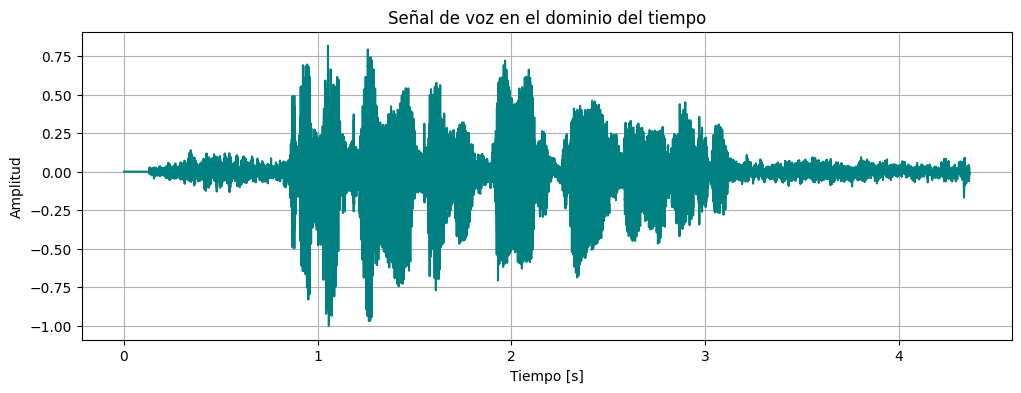

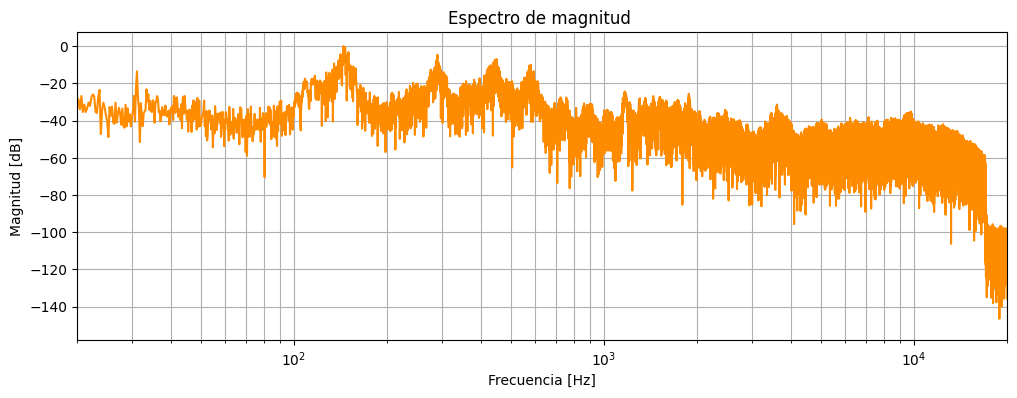


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 144.3 Hz
Frecuencia media: 3604.4 Hz
Brillo espectral: 0.4 
Energía total (intensidad): 3712.911768
Relación Señal/Ruido (SNR): 12.23 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,4.37,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",12.23


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd

ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/hombre 2.wav"

frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)

print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)

datos_audio = datos_audio / np.max(np.abs(datos_audio))

numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")

tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]

plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Transformada de Fourier


numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)

frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])

plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()


indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]

frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total

energia_total = np.sum(datos_audio**2)

# SNR

umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)



print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")



resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

HOMBRE 3

Forma de la señal (shape): (185344,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 4.20 segundos


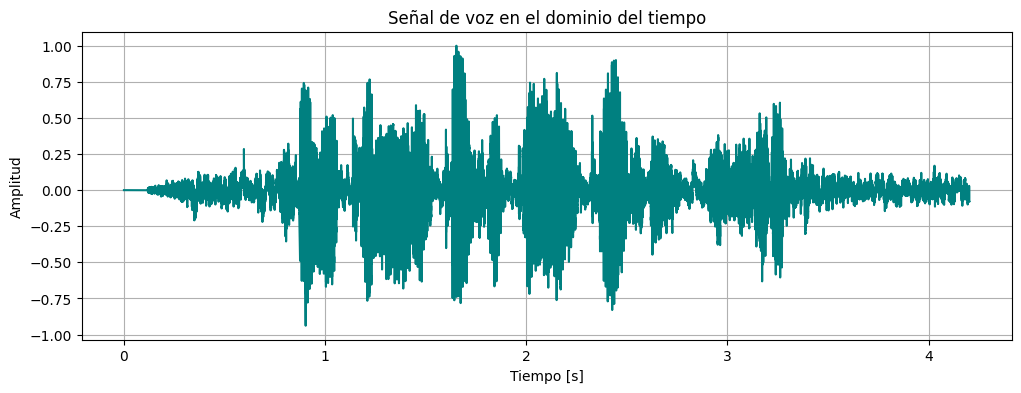

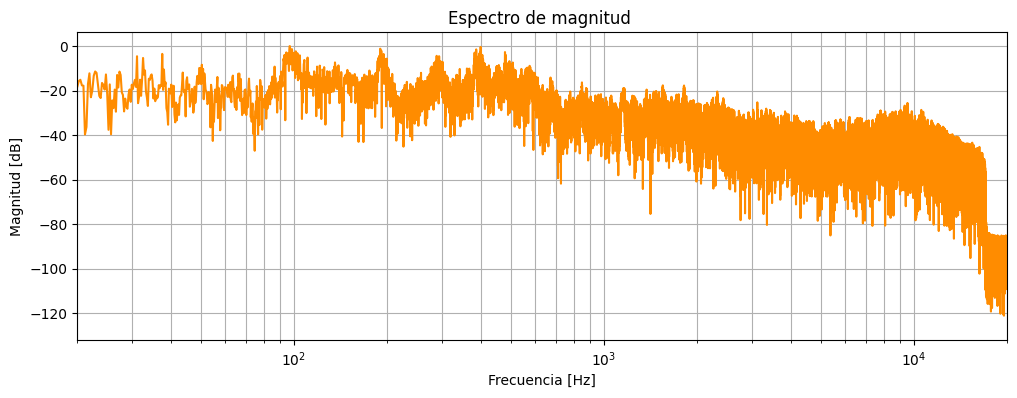


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 96.8 Hz
Frecuencia media: 3657.5 Hz
Brillo espectral: 0.4 
Energía total (intensidad): 3792.482709
Relación Señal/Ruido (SNR): 10.90 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,4.2,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",10.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd

ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/hombre 3.wav"

frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)

print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)

datos_audio = datos_audio / np.max(np.abs(datos_audio))

numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")

tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]

plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)

frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])

plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()

indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]

frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total

energia_total = np.sum(datos_audio**2)

umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)

print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")

resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

MUJER 1

Forma de la señal (shape): (174080,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 3.95 segundos


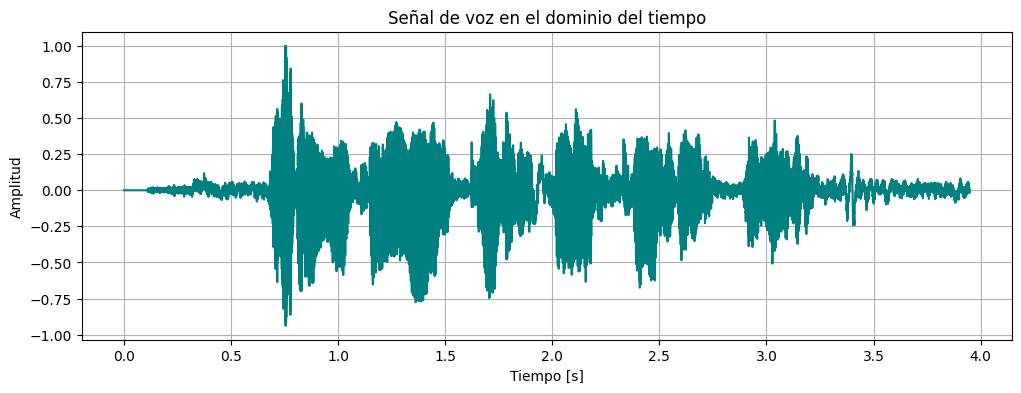

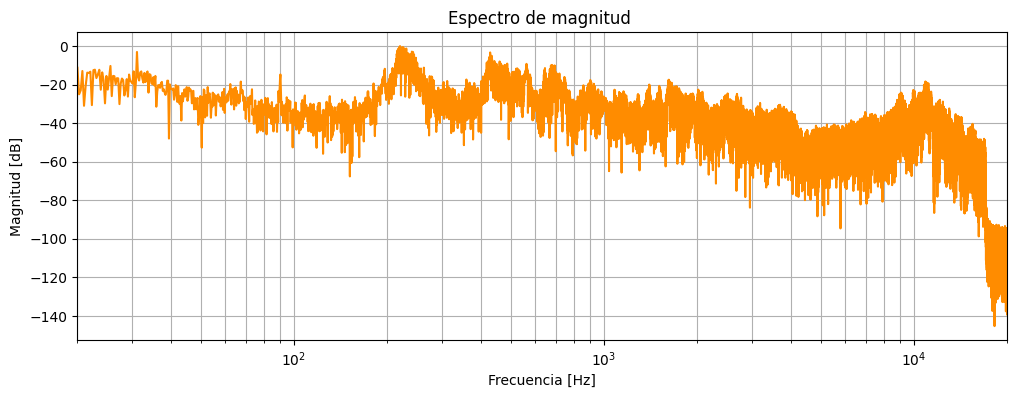


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 219.9 Hz
Frecuencia media: 5457.8 Hz
Brillo espectral: 0.6 
Energía total (intensidad): 3198.715156
Relación Señal/Ruido (SNR): 11.76 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,3.95,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",11.76


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd


ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/mujer 1.wav"


frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)


print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)


datos_audio = datos_audio / np.max(np.abs(datos_audio))


numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")


tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]


plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)


frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])




plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()



indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]


frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total


energia_total = np.sum(datos_audio**2)


umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)



print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")



resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

MUJER 2


Forma de la señal (shape): (215040,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 4.88 segundos


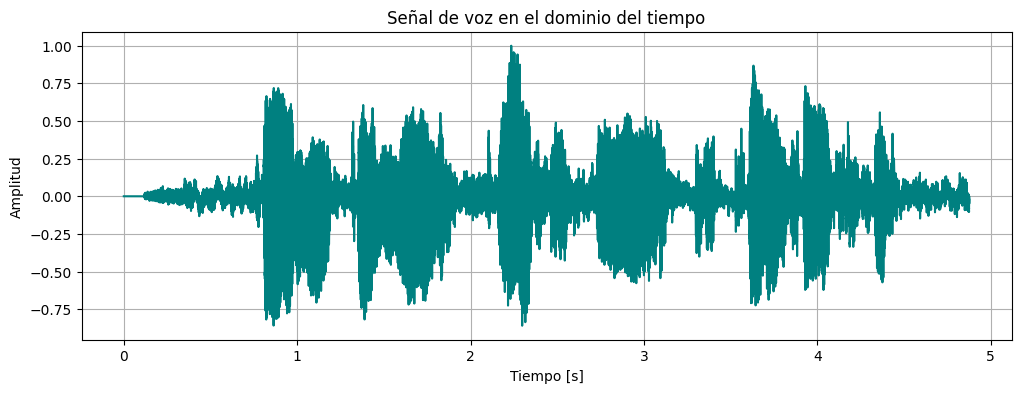

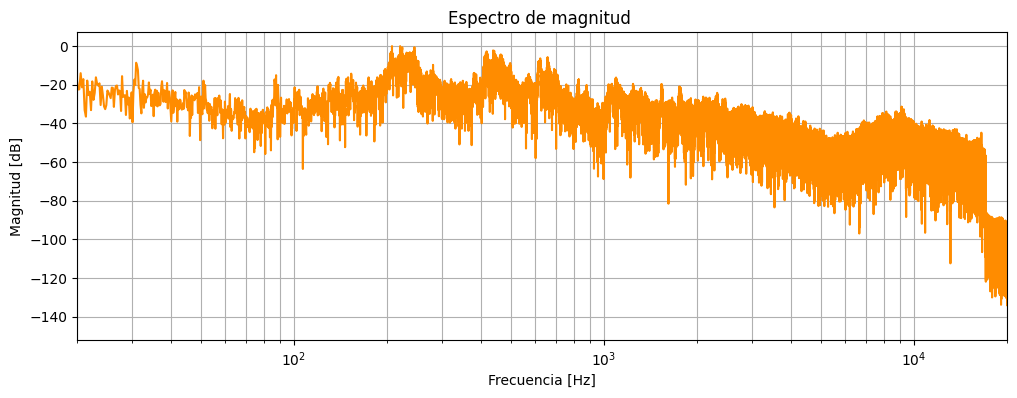


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 207.1 Hz
Frecuencia media: 2804.6 Hz
Brillo espectral: 0.3 
Energía total (intensidad): 6496.236422
Relación Señal/Ruido (SNR): 13.28 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,4.88,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",13.28


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd


ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/mujer 2.wav"


frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)


print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)


datos_audio = datos_audio / np.max(np.abs(datos_audio))


numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")


tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]


plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)


frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])




plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()



indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]


frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total


energia_total = np.sum(datos_audio**2)


umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)



print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")



resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

MUJER 3

Forma de la señal (shape): (205824,)
Tipo de datos (dtype): int16
Frecuencia de muestreo (Hz): 44100
Duración total: 4.67 segundos


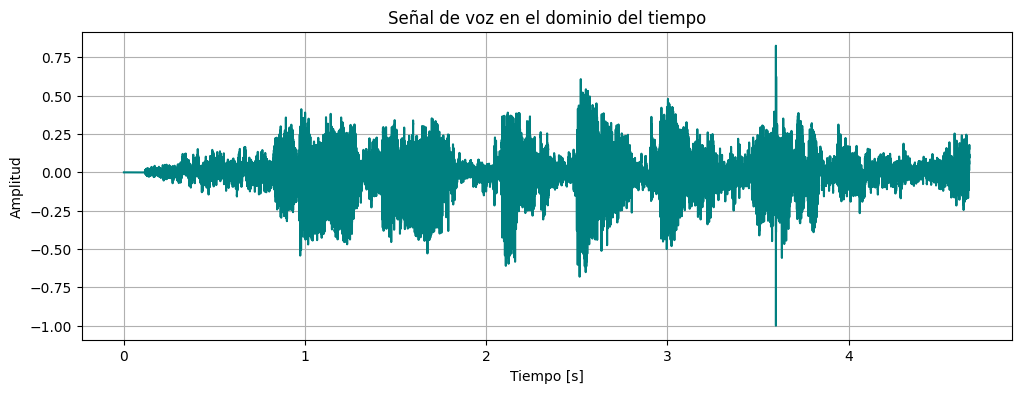

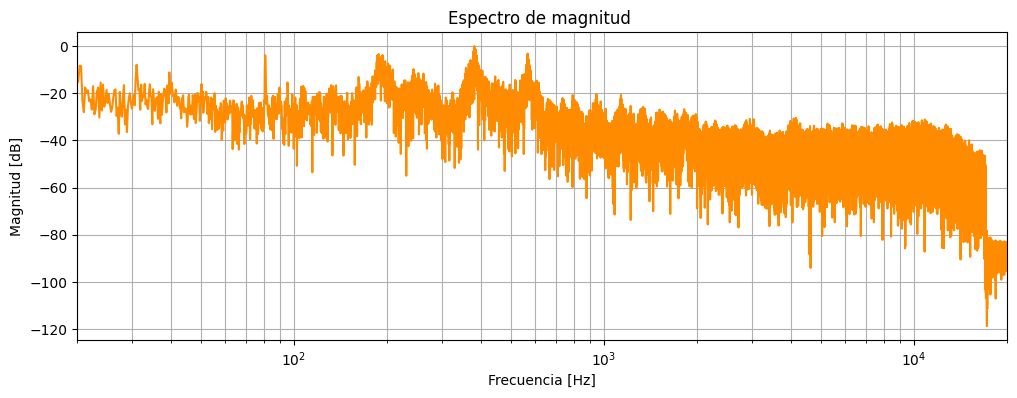


📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:
Frecuencia fundamental: 381.8 Hz
Frecuencia media: 4512.8 Hz
Brillo espectral: 0.5 
Energía total (intensidad): 2392.245868
Relación Señal/Ruido (SNR): 8.05 dB

🧾 REGISTRO DE ADQUISICIÓN:


,Frecuencia de muestreo [Hz],Resolución [bits],Duración [s],Canales,Ganancia/Mic Level,Entorno,Observaciones,SNR [dB]
0,44100,64,4.67,Mono (1 canal),Micrófono de teléfono (nivel medio),"Habitación cerrada, poco ruido","Buena calidad, sin saturación, leve ruido ambi...",8.05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import pandas as pd


ruta_archivo = "/content/drive/MyDrive/Colab Notebooks/mujer 3.wav"


frecuencia_muestreo, datos_audio = wavfile.read(ruta_archivo)


print("Forma de la señal (shape):", datos_audio.shape)
print("Tipo de datos (dtype):", datos_audio.dtype)
print("Frecuencia de muestreo (Hz):", frecuencia_muestreo)


datos_audio = datos_audio / np.max(np.abs(datos_audio))


numero_muestras = len(datos_audio)
duracion_segundos = numero_muestras / frecuencia_muestreo
print(f"Duración total: {duracion_segundos:.2f} segundos")


tiempo = np.arange(0, duracion_segundos, 1/frecuencia_muestreo)
tiempo = tiempo[:len(datos_audio)]


plt.figure(figsize=(12,4))
plt.plot(tiempo, datos_audio, color='teal')
plt.title("Señal de voz en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



numero_puntos = len(datos_audio)
transformada_fft = fft(datos_audio)
frecuencias = fftfreq(numero_puntos, d=1/frecuencia_muestreo)


frecuencias_positivas = frecuencias[:numero_puntos//2]
magnitud_fft = np.abs(transformada_fft[:numero_puntos//2])




plt.figure(figsize=(12,4))
plt.semilogx(frecuencias_positivas, 20*np.log10(magnitud_fft/np.max(magnitud_fft)), color='darkorange')
plt.title("Espectro de magnitud ")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.xlim(20, 20000)
plt.grid(True, which='both')
plt.show()



indice_pico_principal = np.argmax(magnitud_fft)
frecuencia_fundamental = frecuencias_positivas[indice_pico_principal]


frecuencia_media = np.sum(frecuencias_positivas * magnitud_fft) / np.sum(magnitud_fft)

f_umbral = 2000
energia_total = np.sum(magnitud_fft)
energia_alta = np.sum(magnitud_fft[frecuencias_positivas > f_umbral])
brillo_espectral = energia_alta / energia_total


energia_total = np.sum(datos_audio**2)


umbral_ruido = 0.1 * np.max(np.abs(datos_audio))
parte_senal = datos_audio[np.abs(datos_audio) >= umbral_ruido]
parte_ruido = datos_audio[np.abs(datos_audio) < umbral_ruido]

energia_senal = np.sum(parte_senal**2)
energia_ruido = np.sum(parte_ruido**2)
SNR_dB = 10 * np.log10(energia_senal / energia_ruido)



print("\n📊 RESULTADOS DEL ANÁLISIS ESPECTRAL:")
print(f"Frecuencia fundamental: {frecuencia_fundamental:.1f} Hz")
print(f"Frecuencia media: {frecuencia_media:.1f} Hz")
print(f"Brillo espectral: {brillo_espectral:.1f} ")
print(f"Energía total (intensidad): {energia_total:.6f}")
print(f"Relación Señal/Ruido (SNR): {SNR_dB:.2f} dB")



resolucion_bits = 64
tipo_canal = "Mono (1 canal)"
nivel_entrada = "Micrófono de teléfono (nivel medio)"
entorno_grabacion = "Habitación cerrada, poco ruido"
observaciones = "Buena calidad, sin saturación, leve ruido ambiental"

registro_adquisicion = {
    "Frecuencia de muestreo [Hz]": [frecuencia_muestreo],
    "Resolución [bits]": [resolucion_bits],
    "Duración [s]": [round(duracion_segundos,2)],
    "Canales": [tipo_canal],
    "Ganancia/Mic Level": [nivel_entrada],
    "Entorno": [entorno_grabacion],
    "Observaciones": [observaciones],
    "SNR [dB]": [round(SNR_dB, 2)]
}

tabla_registro = pd.DataFrame(registro_adquisicion)
print("\n🧾 REGISTRO DE ADQUISICIÓN:")
display(tabla_registro)

#Parte B

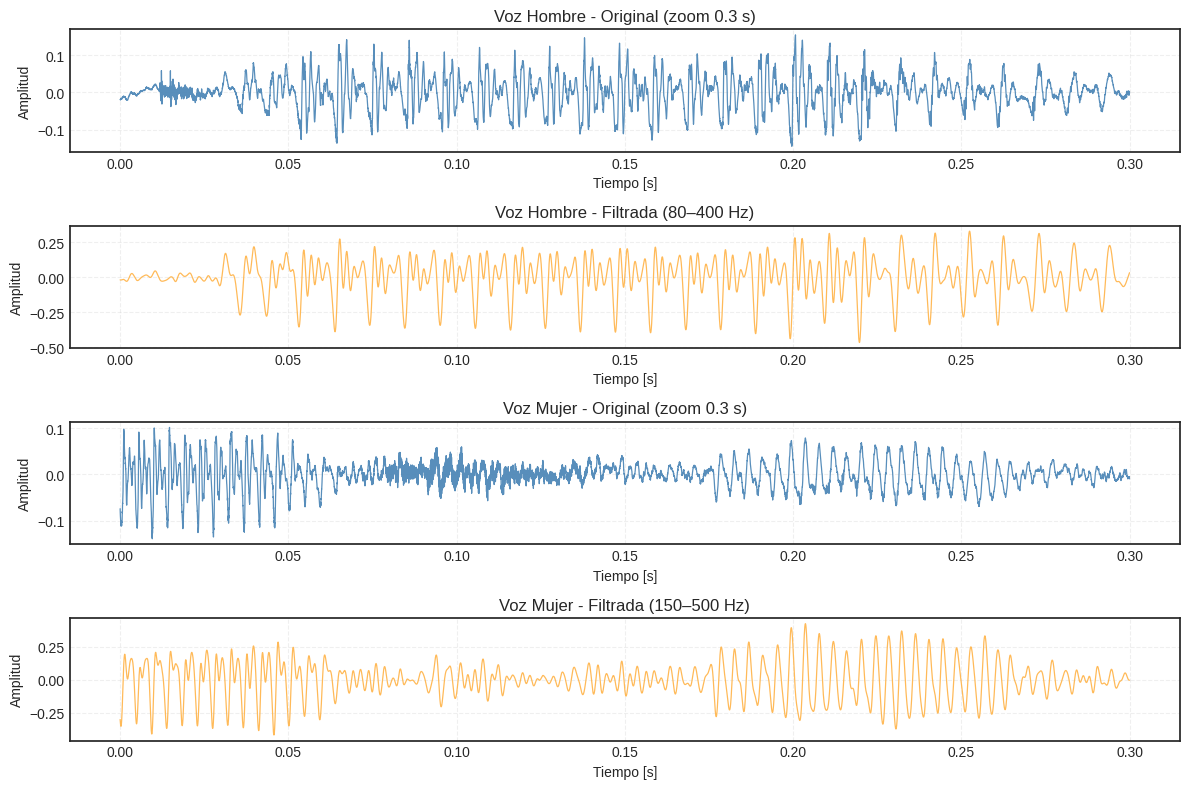

In [ ]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt

# filtro pasa banda
def bandpass_filter(signal, fs, lowcut, highcut, order=2):
    signal = signal / np.max(np.abs(signal))
    nyq = fs / 2
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', output='sos')
    return sosfiltfilt(sos, signal)

# lectura de las voces
sig_h, fs_h = sf.read('/content/drive/MyDrive/Colab Notebooks/hombre 3.wav')
sig_m, fs_m = sf.read('/content/drive/MyDrive/Colab Notebooks/mujer 2.wav')


if sig_h.ndim > 1:
    sig_h = sig_h.mean(axis=1)
if sig_m.ndim > 1:
    sig_m = sig_m.mean(axis=1)

# aplico el filtro
filtro_h = bandpass_filter(sig_h, fs_h, 80, 400)
filtro_m = bandpass_filter(sig_m, fs_m, 150, 500)


def fragmento_central(signal, fs, dur=0.3):
    c = len(signal) // 2
    n = int(fs * dur / 2)
    i, f = max(0, c - n), min(len(signal), c + n)
    t = np.arange(f - i) / fs
    return signal[i:f], t

frag_h, t_h = fragmento_central(sig_h, fs_h)
frag_fh, t_fh = fragmento_central(filtro_h, fs_h)
frag_m, t_m = fragmento_central(sig_m, fs_m)
frag_fm, t_fm = fragmento_central(filtro_m, fs_m)

# graficas
plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-white')

plt.subplot(4,1,1)
plt.plot(t_h, frag_h, color='steelblue', linewidth=0.9, alpha=0.9)
plt.title('Voz Hombre - Original (zoom 0.3 s)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(4,1,2)
plt.plot(t_fh, frag_fh, color='#FFB347', linewidth=0.9, alpha=0.9)
plt.title('Voz Hombre - Filtrada (80–400 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(4,1,3)
plt.plot(t_m, frag_m, color='steelblue', linewidth=0.9, alpha=0.9)
plt.title('Voz Mujer - Original (zoom 0.3 s)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)

plt.subplot(4,1,4)
plt.plot(t_fm, frag_fm, color='#FFB347', linewidth=0.9, alpha=0.9)
plt.title('Voz Mujer - Filtrada (150–500 Hz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


=== Jitter Voz Hombre ===
Jitter absoluto: 0.001915 s
Jitter relativo: 23.86 %

=== Jitter Voz Mujer ===
Jitter absoluto: 0.000948 s
Jitter relativo: 19.13 %
\=== Shimmer Voz Hombre ===
Shimmer absoluto: 0.033838
Shimmer relativo: 33.73 %
\=== Shimmer Voz Mujer ===
Shimmer absoluto: 0.030640
Shimmer relativo: 20.89 %


<>:42: SyntaxWarning: invalid escape sequence '\='
<>:46: SyntaxWarning: invalid escape sequence '\='
<>:42: SyntaxWarning: invalid escape sequence '\='
<>:46: SyntaxWarning: invalid escape sequence '\='
/tmp/ipython-input-1769352150.py:42: SyntaxWarning: invalid escape sequence '\='
  print("\=== Shimmer Voz Hombre ===")
/tmp/ipython-input-1769352150.py:46: SyntaxWarning: invalid escape sequence '\='
  print("\=== Shimmer Voz Mujer ===")


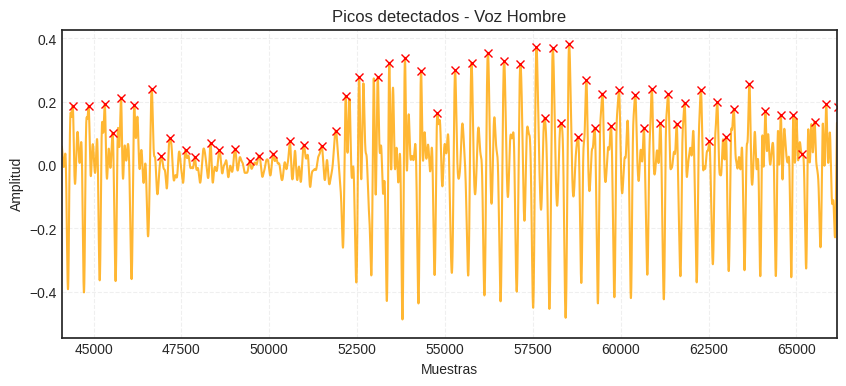

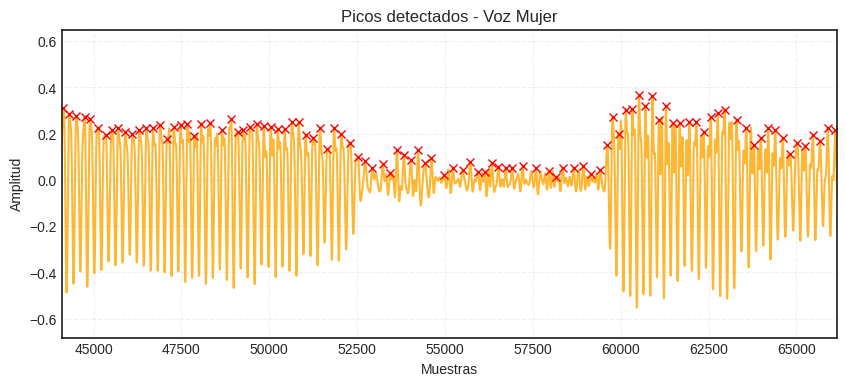

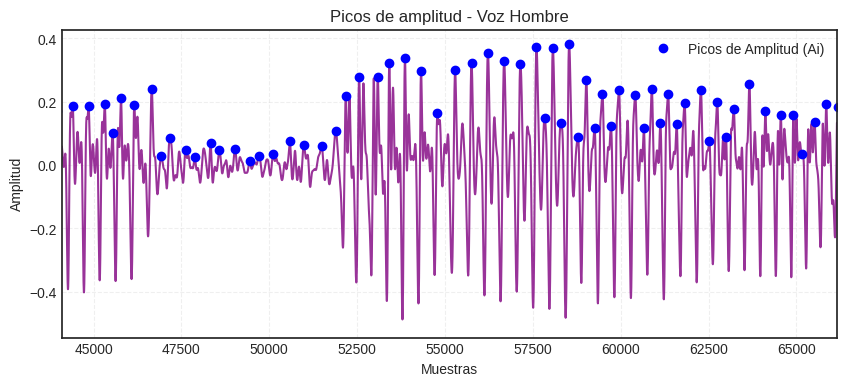

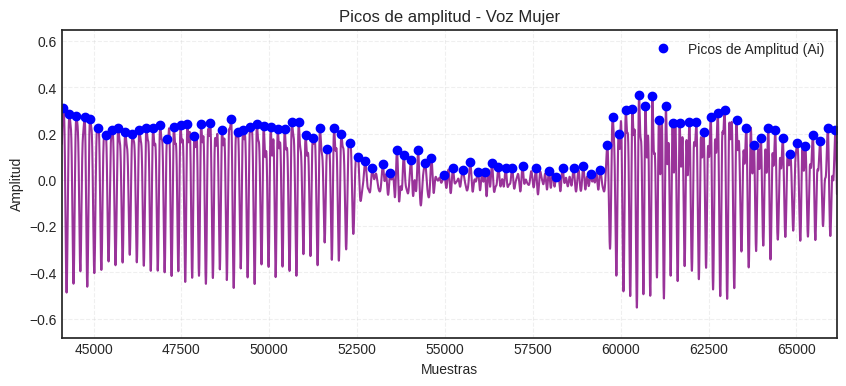

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# detección de picos (periodos sucesivos)
peaks_h, _ = find_peaks(filtro_h, height=0, distance=fs_h//200)
peaks_m, _ = find_peaks(filtro_m, height=0, distance=fs_m//300)

# cálculo de los periodos Ti
Ti_h = np.diff(peaks_h) / fs_h
Ti_m = np.diff(peaks_m) / fs_m

# jitter absoluto
JitterAbs_h = np.mean(np.abs(np.diff(Ti_h)))
JitterAbs_m = np.mean(np.abs(np.diff(Ti_m)))

# jitter relativo (%)
JitterRel_h = (JitterAbs_h / np.mean(Ti_h)) * 100
JitterRel_m = (JitterAbs_m / np.mean(Ti_m)) * 100

# Se toma la amplitud (valor de pico) en cada máximo detectado
A_h = filtro_h[peaks_h]
A_m = filtro_m[peaks_m]

# Shimmer absoluto
ShimmerAbs_h = np.mean(np.abs(np.diff(A_h)))
ShimmerAbs_m = np.mean(np.abs(np.diff(A_m)))

# Shimmer relativo (%)
ShimmerRel_h = (ShimmerAbs_h / np.mean(A_h)) * 100
ShimmerRel_m = (ShimmerAbs_m / np.mean(A_m)) * 100

# resultados
print("=== Jitter Voz Hombre ===")
print(f"Jitter absoluto: {JitterAbs_h:.6f} s")
print(f"Jitter relativo: {JitterRel_h:.2f} %")

print("\n=== Jitter Voz Mujer ===")
print(f"Jitter absoluto: {JitterAbs_m:.6f} s")
print(f"Jitter relativo: {JitterRel_m:.2f} %")

print("\=== Shimmer Voz Hombre ===")
print(f"Shimmer absoluto: {ShimmerAbs_h:.6f}")
print(f"Shimmer relativo: {ShimmerRel_h:.2f} %")

print("\=== Shimmer Voz Mujer ===")
print(f"Shimmer absoluto: {ShimmerAbs_m:.6f}")
print(f"Shimmer relativo: {ShimmerRel_m:.2f} %")

# graficas de los picos detectados
plt.figure(figsize=(10,4))
plt.plot(filtro_h, color='orange', alpha=0.8)
plt.plot(peaks_h, filtro_h[peaks_h], 'x', color='red')
plt.title('Picos detectados - Voz Hombre')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(1 * fs_h, 1.5 * fs_h)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(filtro_m, color='orange', alpha=0.8)
plt.plot(peaks_m, filtro_m[peaks_m], 'x', color='red')
plt.title('Picos detectados - Voz Mujer')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(1 * fs_m, 1.5 * fs_m)
plt.show()

# Picos de amplitud (Ai) - Hombre.
plt.figure(figsize=(10,4))
plt.plot(filtro_h, color='purple', alpha=0.8)
plt.plot(peaks_h, A_h, 'o', color='blue', label='Picos de Amplitud (Ai)')
plt.title('Picos de amplitud - Voz Hombre')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(1 * fs_h, 1.5 * fs_h)
plt.show()

#Picos de amplitud (Ai) - Mujer.
plt.figure(figsize=(10,4))
plt.plot(filtro_m, color='purple', alpha=0.8)
plt.plot(peaks_m, A_m, 'o', color='blue', label='Picos de Amplitud (Ai)')
plt.title('Picos de amplitud - Voz Mujer')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(1 * fs_m, 1.5 * fs_m)
plt.show()



In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import find_peaks

# Lista de archivos de voz
archivos_hombres = [ "/content/drive/MyDrive/Colab Notebooks/hombre 1.wav" ,"/content/drive/MyDrive/Colab Notebooks/hombre 2.wav", "/content/drive/MyDrive/Colab Notebooks/hombre 3.wav"]
archivos_mujeres = ["/content/drive/MyDrive/Colab Notebooks/mujer 1.wav", "/content/drive/MyDrive/Colab Notebooks/mujer 2.wav","/content/drive/MyDrive/Colab Notebooks/mujer 3.wav"]

def calcular_jitter_shimmer(archivo):
    fs, voz = wavfile.read(archivo)

    # Detectar picos
    peaks, _ = find_peaks(voz, height=0, distance=fs//200)
    periodos = np.diff(peaks) / fs       # tiempo entre picos
    amplitudes = voz[peaks]              # amplitudes de los picos

    # Calcular Jitter y Shimmer
    jitter_val = np.mean(np.abs(np.diff(periodos))) / np.mean(periodos) * 100
    shimmer_val = np.mean(np.abs(np.diff(amplitudes))) / np.mean(amplitudes) * 100

    return jitter_val, shimmer_val

# Calcular para todos los archivos
resultados_hombres = [calcular_jitter_shimmer(f) for f in archivos_hombres]
resultados_mujeres = [calcular_jitter_shimmer(f) for f in archivos_mujeres]

# Mostrar resultados
print("===== Valores de Jitter y Shimmer =====")
for i, (j, s) in enumerate(resultados_hombres):
    print(f"Hombre {i+1}: Jitter = {j:.2f}%, Shimmer = {s:.2f}%")
for i, (j, s) in enumerate(resultados_mujeres):
    print(f"Mujer {i+1}: Jitter = {j:.2f}%, Shimmer = {s:.2f}%")


===== Valores de Jitter y Shimmer =====
Hombre 1: Jitter = 20.24%, Shimmer = 27.83%
Hombre 2: Jitter = 18.81%, Shimmer = 22.86%
Hombre 3: Jitter = 27.18%, Shimmer = 65.59%
Mujer 1: Jitter = 28.50%, Shimmer = 38.66%
Mujer 2: Jitter = 22.15%, Shimmer = 38.03%
Mujer 3: Jitter = 20.50%, Shimmer = 33.43%
